### Tarea 2
#### Hacer 1 figura de latitud vs presión atmosférica. Esta figura se denomina sección transversal.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.colors as mcolors

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

c:\Users\nicol\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Extracion de dataset ERA 5
ERA_5 = xr.open_dataset(
    r'C:\Users\nicol\Desktop\Articulo\TAREAS\3. Visualizacion de datos\Archivos NC\ERA 5.nc', chunks=-1)
ERA_5

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 221, level: 37, time: 251)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-02-01
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-20 16:11:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
# Establecemos los datos en funcion de tiempo 1950-2021
ERA_5_1951_2021 = ERA_5.sel(time=slice('1950-12-01T00:00:00.000000000','2021-02-01T00:00:00.000000000'))

In [4]:
# Obtenemos media de v, u, w y humedad respecto al datarrays tiempo, longitud
V_MEAN = ERA_5_1950_2021['v'].mean(('time', 'longitude'))
U_MEAN = ERA_5_1950_2021['u'].mean(('time', 'longitude'))
W_MEAN = ERA_5_1950_2021['w'].mean(('time', 'longitude')) * -100
Q = ERA_5_1950_2021['q'].mean(('time', 'longitude')) * 1000  # Transformar a gramos

print(W_MEAN.shape)
print(W_MEAN.dims)
print(V_MEAN.shape)

(37, 221)
('level', 'latitude')
(37, 221)


In [5]:
# Seleccionamos U, V, W y Humedad especifica a niveles desde 150 a 1000
V_150_1000 = V_MEAN.sel(level=slice(150, 1000))
U_150_1000 = U_MEAN.sel(level=slice(150, 1000))
W_150_1000 = W_MEAN.sel(level=slice(150, 1000))
HUMIDITY_150_1000 = Q.sel(level=slice(150, 1000))
Q.values

array([[3.93927516e-03, 3.93902278e-03, 3.93881323e-03, ...,
        3.92664922e-03, 3.92852770e-03, 3.92912142e-03],
       [3.69771919e-03, 3.69495549e-03, 3.69292800e-03, ...,
        3.74322711e-03, 3.74412281e-03, 3.74493608e-03],
       [3.55522358e-03, 3.55145172e-03, 3.54945590e-03, ...,
        3.62745137e-03, 3.63049004e-03, 3.63190775e-03],
       ...,
       [1.27821970e+01, 1.28018169e+01, 1.28286762e+01, ...,
        7.22555161e+00, 7.14303207e+00, 7.06486130e+00],
       [1.34984455e+01, 1.35187130e+01, 1.35543900e+01, ...,
        7.79414320e+00, 7.70598078e+00, 7.62232256e+00],
       [1.36663198e+01, 1.36921797e+01, 1.37256279e+01, ...,
        8.20392609e+00, 8.11686993e+00, 8.03169918e+00]], dtype=float32)

In [6]:
# Abrimos el dataset 'orography_v2'
OROGRAFIA = xr.open_dataset(
    r'C:\Users\nicol\Desktop\Articulo\TAREAS\3. Visualizacion de datos\Tarea 2\Archivos NC\orography_v2.nc', chunks=-1)
OROGRAFIA

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 241, time: 1)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 1979-01-01
Data variables:
    z          (time, latitude, longitude) float32 dask.array<chunksize=(1, 241, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-30 20:43:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
# Obtenemos la variable Z del dataset OROGRAFIA.
Z = OROGRAFIA['z'].sel(longitude=slice(-70,-60))

In [9]:
# Obtenemos la altura a partir de las coordenas Z del dataset
ALTURA = mpcalc.geopotential_to_height(Z)
# Obtener presion apartir de la altura
PRESION = mpcalc.height_to_pressure_std(ALTURA)
# La presión miníma corresponde a los andes.
PRESION_ANDES = PRESION.min(dim=("longitude", "time"))
PRESION_ANDES

<xarray.DataArray 'mul-0f15631420e9f15df177945dc21679b6' (latitude: 241)>
<Quantity(dask.array<_nanmin_skip-aggregate, shape=(241,), dtype=float32, chunksize=(241,), chunktype=numpy.ndarray>, 'hectopascal')>
Coordinates:
  * latitude  (latitude) float32 20.0 19.75 19.5 19.25 ... -39.5 -39.75 -40.0

C:\Users\nicol\AppData\Local\Temp\ipykernel_4840\3634534532.py:8: UserWarning: The following kwargs were not used by contour: 'rasterized'
  HUMIDITY_COUNTOURF = ax.contourf(HUMIDITY_150_1000["latitude"], HUMIDITY_150_1000["level"],


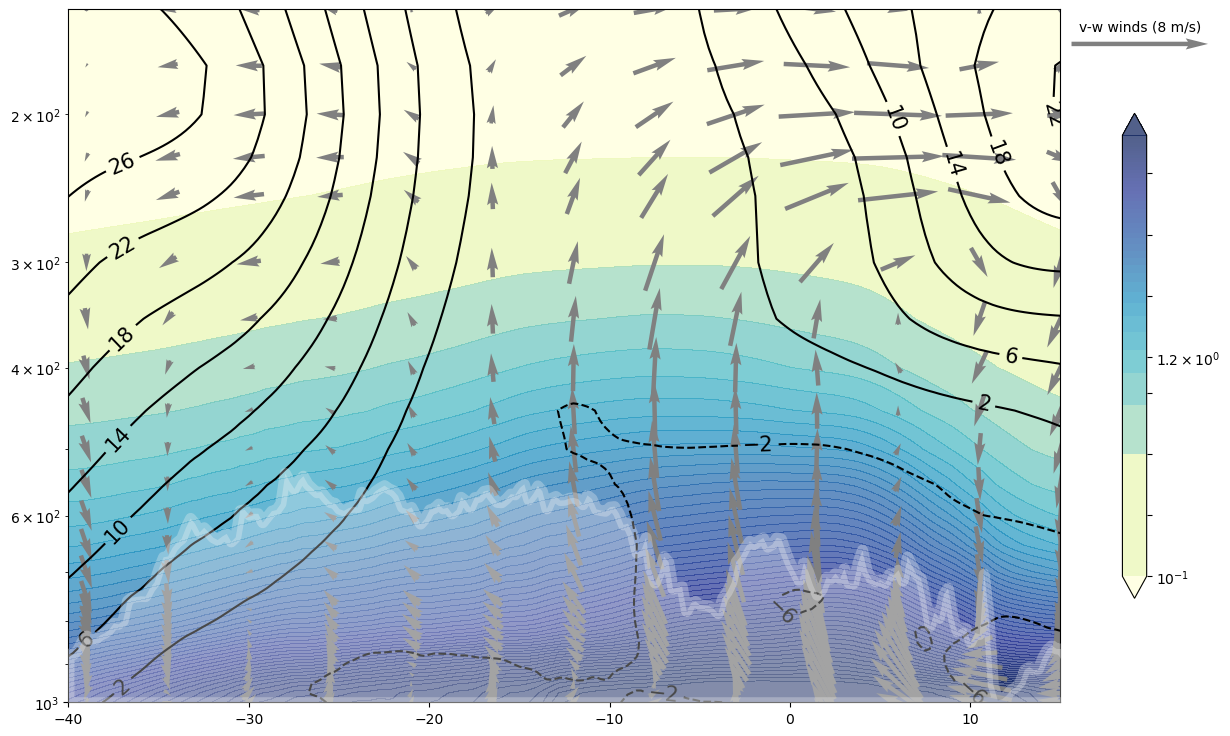

In [11]:
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Contourf de Humedad especifica en rangos de presion 150 a 1000 hPa
levels_plot = np.arange(0.1, 15, 0.3)
norm = mcolors.LogNorm(vmin=0.1, vmax=15)

HUMIDITY_COUNTOURF = ax.contourf(HUMIDITY_150_1000["latitude"], HUMIDITY_150_1000["level"],
                                 HUMIDITY_150_1000, cmap="YlGnBu",
                                 norm=norm,
                                 alpha=0.7,
                                 rasterized=True,
                                 extend="both", levels=levels_plot)

# ax.invert_yaxis()
ticks_scores = np.arange(0.1, 1, 0.2)

rh_colorbar = fig.colorbar(HUMIDITY_COUNTOURF, shrink=0.7,
                           ticks=[0.1, 0.2, 0.4, 0.8, 1.2, 2.4, 4.8, 9.6, 19.2])
# Región limitada
ax.set_ylim([1000, 150])
ax.set_xlim([-40, 15])
# figura escalado logaritmicamente.
plt.yscale("log")

# Quivers de V y W en rangos de presion 150 a 1000 hPa
QUIVERS_U_W = ax.quiver(ERA_5['latitude'][::18], ERA_5['level'],
                        V_MEAN[::, ::18], W_MEAN[::, ::18],
                        scale=None,
                        width=0.0045, color="grey", pivot="mid", headwidth=2.5)

symbol = ax.quiverkey(QUIVERS_U_W, X=1.08, Y=0.95,
                      U=8, label="v-w winds (8 m/s)")


# Contour de U en rangos de presion 150 a 1000 hPa
U_CONTOUR = ax.contour(U_150_1000['latitude'], U_150_1000['level'], U_150_1000,
                       colors=["k"], linewidths=1.5, levels=np.arange(-10, 31, 4))

# Añadir etiquetas
ax.clabel(U_CONTOUR, U_CONTOUR.levels[::1], inline=True, fontsize=15)

# Enmarcar maxima elevacion de los andes.
ax.fill_between(PRESION_ANDES.latitude,
                PRESION_ANDES, np.ones(len(PRESION_ANDES))*1000,
                lw=8, color='whitesmoke', zorder=1000,
                alpha=0.3
                )
# Esta funcion permite rasterizar la imagen.
ax.set_rasterized(True)

plt.savefig("CROSS_SECTION_CORREGIDO_V1.svg", bbox_inches='tight', dpi=500)
plt.savefig("CROSS_SECTION_CORREGIDO_V1.png", bbox_inches='tight', dpi=500)

In [11]:
# Obtenemos media de v, u, w y humedad respecto al datarrays tiempo, longitud
V = ERA_5_1951_2021['v'].mean(('longitude'))
U = ERA_5_1951_2021['u'].mean(('longitude'))
W = ERA_5_1951_2021['w'].mean(('longitude')) * -100
Q = ERA_5_1951_2021['q'].mean(('longitude')) * 1000  # Transformar a gramos

print(W.dims)
print(W.shape)
print(V.shape)

('time', 'level', 'latitude')
(213, 37, 221)
(213, 37, 221)


In [12]:
# Seleccionamos U, V, W y Humedad especifica a niveles desde 150 a 1000
V_150_1000 = V.sel(level=slice(150, 1000))
U_150_1000 = U.sel(level=slice(150, 1000))
W_150_1000 = W.sel(level=slice(150, 1000))
Q_150_1000 = Q.sel(level=slice(150, 1000))
Q.values

array([[[3.98792326e-03, 3.98792326e-03, 3.98792326e-03, ...,
         3.98792326e-03, 3.98792326e-03, 3.98792326e-03],
        [3.80651164e-03, 3.79129639e-03, 3.77022941e-03, ...,
         3.98792326e-03, 3.98792326e-03, 3.98792326e-03],
        [3.71756149e-03, 3.71053908e-03, 3.70468711e-03, ...,
         3.98792326e-03, 3.98792326e-03, 3.98792326e-03],
        ...,
        [1.35319223e+01, 1.35721970e+01, 1.36136885e+01, ...,
         6.35627222e+00, 6.30165100e+00, 6.24967480e+00],
        [1.42469683e+01, 1.42876234e+01, 1.43233290e+01, ...,
         6.98828316e+00, 6.93339300e+00, 6.87762737e+00],
        [1.44174147e+01, 1.44647512e+01, 1.44989281e+01, ...,
         7.40841770e+00, 7.35117340e+00, 7.29822731e+00]],

       [[3.98792326e-03, 3.98792326e-03, 3.98792326e-03, ...,
         3.98792326e-03, 3.98792326e-03, 3.98792326e-03],
        [3.68244946e-03, 3.68244946e-03, 3.68244946e-03, ...,
         3.98792326e-03, 3.98792326e-03, 3.98792326e-03],
        [3.68244946e-03, 

In [17]:
for i in range(50):
    fig = plt.figure(1, figsize=(16., 9.))
    ax = plt.axes()

    # Contourf de Humedad especifica en rangos de presion 150 a 1000 hPa
    levels_plot = np.arange(0.1, 15, 0.3)
    norm = mcolors.LogNorm(vmin=0.1, vmax=15)

    Q_COUNTOURF = ax.contourf(Q_150_1000["latitude"], Q_150_1000["level"],
                                    Q_150_1000[i,:,:], cmap="YlGnBu",
                                    norm=norm,
                                    alpha=0.7,
                                    rasterized=True,
                                    extend="both", levels=levels_plot)

    # ax.invert_yaxis()
    # Región limitada
    ax.set_ylim([1000, 150])
    ax.set_xlim([-40, 15])
    # figura escalado logaritmicamente.
    plt.yscale("log")

    # Quivers de V y W en rangos de presion 150 a 1000 hPa
    QUIVERS_U_W = ax.quiver(ERA_5['latitude'][::18], ERA_5['level'],
                            V[i, ::, ::18], W[i, ::, ::18],
                            scale=None,
                            width=0.0045, color="grey", pivot="mid", headwidth=2.5)

    symbol = ax.quiverkey(QUIVERS_U_W, X=1.08, Y=0.95,
                        U=8, label="v-w winds (8 m/s)")


    # Contour de U en rangos de presion 150 a 1000 hPa
    U_CONTOUR = ax.contour(U_150_1000['latitude'], U_150_1000['level'], U_150_1000[i,:,:],
                        colors=["k"], linewidths=1.5, levels=np.arange(-10, 31, 4))

    # Añadir etiquetas
    ax.clabel(U_CONTOUR, U_CONTOUR.levels[::1], inline=True, fontsize=15)

    # Enmarcar maxima elevacion de los andes.
    ax.fill_between(PRESION_ANDES.latitude,
                    PRESION_ANDES, np.ones(len(PRESION_ANDES))*1000,
                    lw=8, color='whitesmoke', zorder=1000,
                    alpha=0.3   
                    )
    # Esta funcion permite rasterizar la imagen.
    ax.set_rasterized(True)

    # plt.savefig("CROSS_SECTION_CORREGIDO_V1.svg", bbox_inches='tight', dpi=500)
    plt.savefig(f"D:\Imagenes tarea 2\CROSS_SECTION_{i}.png", bbox_inches='tight', dpi=500)
    plt.close()

C:\Users\nicol\AppData\Local\Temp\ipykernel_9060\3661210159.py:9: UserWarning: The following kwargs were not used by contour: 'rasterized'
  Q_COUNTOURF = ax.contourf(Q_150_1000["latitude"], Q_150_1000["level"],


In [18]:
import os
import pyttsx3
os.system('shutdown -s')

0